In [0]:
import  tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, BatchNormalization
import  numpy as np
import matplotlib.pyplot as plt

In [3]:
batch_size = 1024*3
num_classes = 2
epochs = 200

train_X = np.load(r"CNNData/train_X.npy")
train_X = np.expand_dims(train_X,axis=3)
train_Y = np.load(r"CNNData/train_Y.npy")

test_X = np.load(r"CNNData/test_X.npy")
test_X = np.expand_dims(test_X,axis=3)
test_Y = np.load(r"CNNData/test_Y.npy")

real_X = np.load(r"CNNData/real_X.npy")
real_X = np.expand_dims(real_X,axis=3)
real_Y = np.load(r"CNNData/real_Y.npy")

for i in range(train_Y.shape[0]):
    if train_Y[i,1] == 1:
        train_Y[i,:] = [0,1]
    else:
        train_Y[i,:] = [1,0]
for i in range(test_Y.shape[0]):
    if test_Y[i,1] == 1:
        test_Y[i,:] = [0,1]
    else:
        test_Y[i,:] = [1,0]
for i in range(real_Y.shape[0]):
    if real_Y[i,1] == 1:
        real_Y[i,:] = [0,1]
    else:
        real_Y[i,:] = [1,0]
print(test_Y)

[[1 0]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [9]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),strides=1,padding = "SAME",activation='relu',input_shape=(40, 40, 1)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

# model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding = "SAME",activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

# model.add(Conv2D(128, kernel_size=(3, 3), strides=1, padding = "SAME",activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

# model.add(Conv2D(256, kernel_size=(3, 3), strides=1, padding = "SAME",activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))
# model.summary()

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(40, 40, 1)))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), strides=1, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.4))


# model.add(Flatten())
# # model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))

# model.add(Dense(num_classes))
# model.add(Activation('softmax'))
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 40, 40, 32)        320       
_________________________________________________________________
batch_normalization_v1_11 (B (None, 40, 40, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_v1_12 (B (None, 20, 20, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 128)       73856     
__________

In [10]:
#batch norm 在relu之后
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=1,padding = "SAME",activation='relu',input_shape=(40, 40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding = "SAME",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(128, kernel_size=(3, 3), strides=1, padding = "SAME",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(256, kernel_size=(3, 3), strides=1, padding = "SAME",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])
model.fit(train_X, train_Y, batch_size=batch_size*2, epochs=5,verbose=1, validation_data=(test_X, test_Y))


Train on 331191 samples, validate on 6759 samples
Epoch 1/5
331191/331191 [==============================] - 35s 106us/sample - loss: 0.6511 - acc: 0.8451 - val_loss: 0.4230 - val_acc: 0.7917
Epoch 2/5
331191/331191 [==============================] - 35s 105us/sample - loss: 0.1091 - acc: 0.9578 - val_loss: 0.2596 - val_acc: 0.8871
Epoch 3/5
331191/331191 [==============================] - 34s 104us/sample - loss: 0.0600 - acc: 0.9776 - val_loss: 0.1556 - val_acc: 0.9343
Epoch 4/5
331191/331191 [==============================] - 35s 105us/sample - loss: 0.0437 - acc: 0.9845 - val_loss: 0.0406 - val_acc: 0.9868
Epoch 5/5
331191/331191 [==============================] - 35s 104us/sample - loss: 0.0237 - acc: 0.9917 - val_loss: 0.0315 - val_acc: 0.9879


In [12]:
#batch norm 在relu之前
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=1,padding = "SAME",input_shape=(40, 40, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding = "SAME"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(128, kernel_size=(3, 3), strides=1, padding = "SAME"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(256, kernel_size=(3, 3), strides=1, padding = "SAME"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])
model.fit(train_X, train_Y, batch_size=batch_size*2, epochs=5,verbose=1, validation_data=(test_X, test_Y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 40, 40, 32)        320       
_________________________________________________________________
batch_normalization_v1_15 (B (None, 40, 40, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 40, 40, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_v1_16 (B (None, 20, 20, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 20, 20, 64)        0         
__________

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=1,padding = "SAME",input_shape=(40, 40, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding = "SAME"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(128, kernel_size=(3, 3), strides=1, padding = "SAME"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(256, kernel_size=(3, 3), strides=1, padding = "SAME"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()
# model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs,
#           verbose=1, validation_data=(test_X, test_Y))
import os
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)
tpu_model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
              metrics=['accuracy'])

def train_gen(batch_size):
  while True:
    offset = np.random.randint(0, train_X.shape[0] - batch_size)
    yield train_X[offset:offset+batch_size], train_Y[offset:offset + batch_size]

history = tpu_model.fit(train_X, train_Y, batch_size=batch_size*8, epochs=20,verbose=1, validation_data=(test_X, test_Y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 40, 40, 32)        320       
_________________________________________________________________
batch_normalization_v1_17 (B (None, 40, 40, 32)        128       
_________________________________________________________________
activation_24 (Activation)   (None, 40, 40, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_v1_18 (B (None, 20, 20, 64)        256       
_________________________________________________________________
activation_25 (Activation)   (None, 20, 20, 64)        0         
__________

In [27]:
# tpu_model.fit_generator(train_gen(batch_size*8), epochs=200, steps_per_epoch=len(train_X)//batch_size, validation_data=(test_X, test_Y))
# history = tpu_model.fit(train_X, train_Y, batch_size=batch_size*8, epochs=200,verbose=1, validation_data=(test_X, test_Y))
tpu_model.evaluate(real_X,real_Y,verbose=1)

INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(4,), dtype=tf.int32, name='core_id_150'), TensorSpec(shape=(4, 40, 40, 1), dtype=tf.float32, name='conv2d_26_input_10'), TensorSpec(shape=(4, 2), dtype=tf.float32, name='activation_29_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_26_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 15.799199342727661 secs
 32/140 [=====>........................] - ETA: 58s - loss: 0.0727 - acc: 0.9688INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(1,), dtype=tf.int32, name='core_id_150'), TensorSpec(shape=(1, 40, 40, 1), dtype=tf.float32, name='conv2d_26_input_10'), TensorSpec(shape=(1, 2), dtype=tf.float32, name='activation_29_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_26_input
INFO:tensorflow:

[0.0407107234533344, 0.9852941]

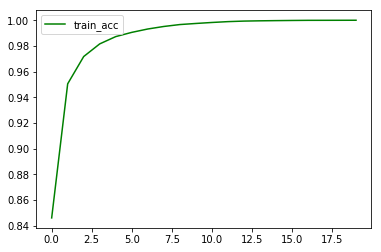

In [28]:

np.savetxt('train_loss.txt',history.history['loss'])
np.savetxt('train_acc.txt',history.history['acc'])
 
# plt.plot(np.loadtxt('train_loss.txt'),color='blue',label='train_loss')
plt.plot(np.loadtxt('train_acc.txt'),color='green',label='train_acc')
plt.legend(loc='best')
plt.show()

In [29]:
tpu_model.save(r'drive/My Drive/Colab Notebooks/CNNData/tpu_model1.keras')

INFO:tensorflow:Copying TPU weights to the CPU


In [0]:
tpu_model.save(r'drive/My Drive/Colab Notebooks/CNNData/tpu_model1.keras')

INFO:tensorflow:Copying TPU weights to the CPU


In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!ls drive/'My Drive'/'Colab Notebooks'/CNNData

model1.keras  real_Y.npy  test_Y.npy	    train_X.npy
real_X.npy    test_X.npy  tpu_model1.keras  train_Y.npy


In [0]:
!cp  -r drive/'My Drive'/'Colab Notebooks'/CNNData CNNData

In [0]:
!ls CNNData

model1.keras  real_Y.npy  test_Y.npy   train_Y.npy
real_X.npy    test_X.npy  train_X.npy


In [0]:
import os
os.listdir()

['.config', 'drive', 'for_colab_cache', 'CNNData', 'sample_data']

In [0]:
import os
import pprint
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()

  print('TPU devices:')
  pprint.pprint(devices)

TPU address is grpc://10.14.132.26:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 16249388749562960940),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 9564113165923993756),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 6526536354007079243),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 8282147341680345465),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 2535314660454128908),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 13102880370169509695),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 4700620591374222133),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 13415833834741176358),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 1172960387428